# Chapter 3

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


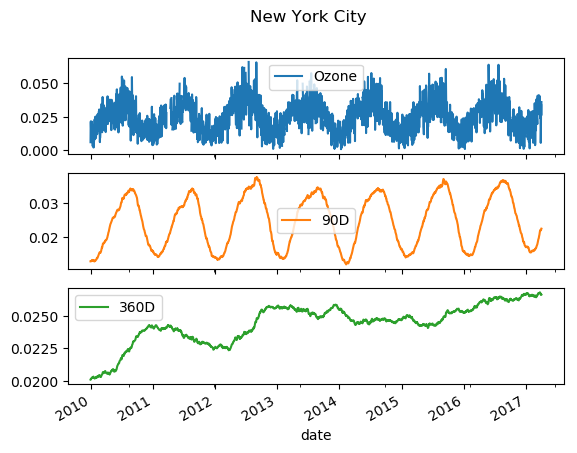

In [14]:
# Import and inspect ozone data here
data = pd.read_csv('./data/ozone_nyc.csv', index_col='date', parse_dates=['date'])
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling(window='90D').mean()
data['360D'] = data.Ozone.rolling(window='360D').mean()

# Plot data
data['2010':].plot(subplots=True, title='New York City')
plt.show()

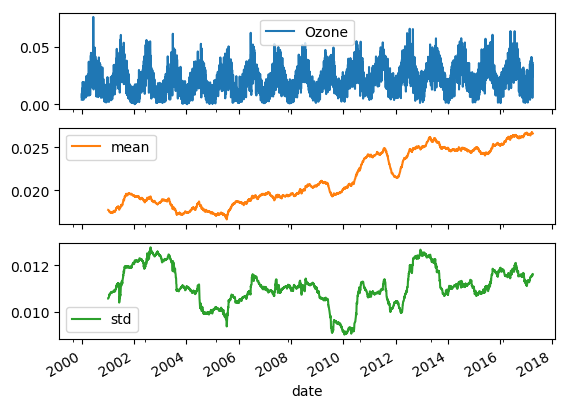

In [20]:
# Import and inspect ozone data here
data = pd.read_csv('./data/ozone_nyc.csv', index_col='date', parse_dates=['date']).dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(window=360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
None


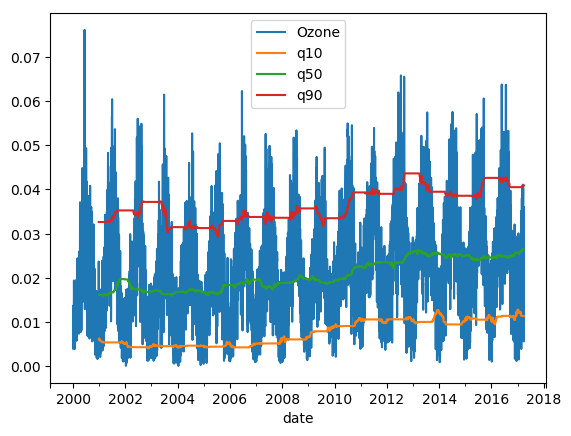

In [25]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.Ozone.rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot monthly returns
data.plot()
plt.show()

## Expanding Windows

In [38]:
# data prep
data = pd.read_csv('./data/google.csv', index_col='Date', parse_dates=['Date'])
data = data.dropna()
print(data.head())

# Calculate differences
differences = data.diff().dropna()
print(differences.head())

# Select start price
start_price = data.first('D')
print(start_price)

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()
print(cumulative_sum.head())

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04
            Close
Date             
2014-01-03  -4.05
2014-01-06   6.15
2014-01-07  10.76
2014-01-08   1.18
2014-01-09  -5.49
            Close
Date             
2014-01-02  556.0
             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04
True


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
AAPL    1624 non-null float64
GOOG    1864 non-null float64
dtypes: float64(2)
memory usage: 43.7 KB


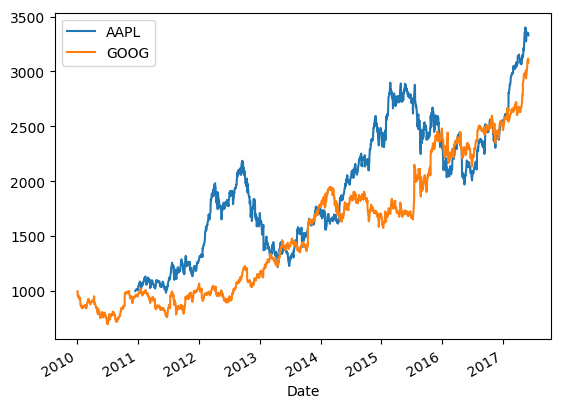

In [45]:
# data prep
data = pd.read_csv('./data/apple_google.csv', index_col='Date', parse_dates=['Date'])
data.info()

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = 1 + returns
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

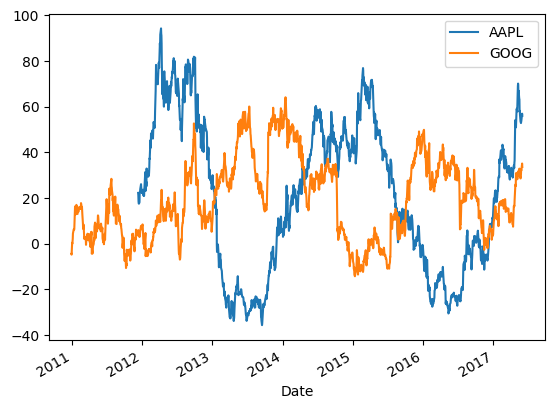

In [62]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window='360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

In [60]:
np.prod(1+data.pct_change())

AAPL    3.328830
GOOG    3.082029
dtype: float64

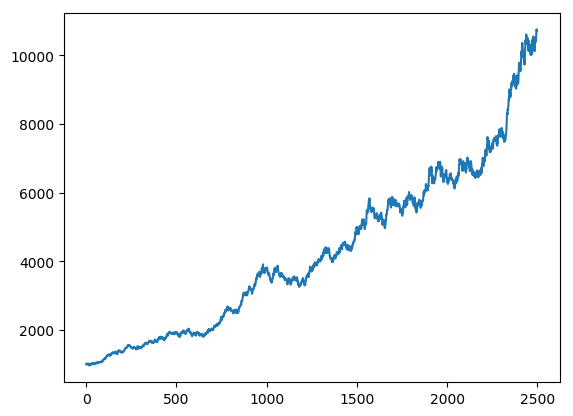

In [74]:
# Set seed here
seed = 42

# Create random_walk
random_walk = np.random.normal(size=2500, loc=.001, scale=.01)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

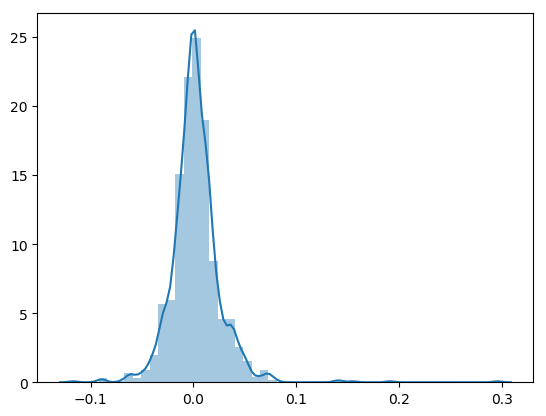

In [119]:
# data prep
import seaborn as sns
fb = pd.read_csv('./data/fb.csv', header=None, index_col=0, parse_dates=[0], squeeze=True)

# Set seed here
seed = 42

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = np.random.choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk, index=fb[1:].index)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

0
2012-05-18   -0.002730
2012-05-21    0.013891
2012-05-22   -0.006811
2012-05-23    0.003833
2012-05-24    0.002786
2012-05-25   -0.028015
2012-05-29    0.003130
2012-05-30    0.013571
2012-05-31   -0.023314
2012-06-01    0.010388
dtype: float64
2012-05-17    38.000000
2012-05-18     0.997270
2012-05-21     1.013891
2012-05-22     0.993189
2012-05-23     1.003833
2012-05-24     1.002786
2012-05-25     0.971985
2012-05-29     1.003130
2012-05-30     1.013571
2012-05-31     0.976686
dtype: float64


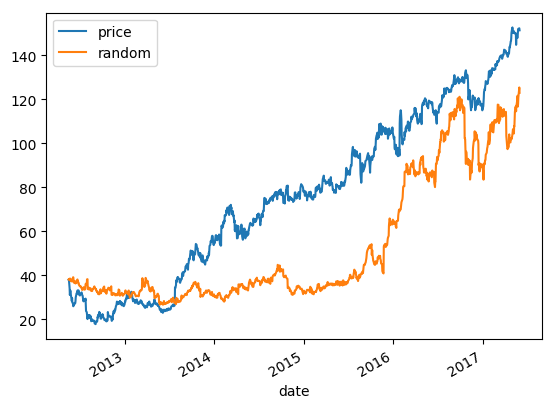

In [165]:
# data prep
fb = pd.read_csv('./data/fb.csv',
                 header=None,
                 names=['date', 'price'],
                 index_col=0,
                 parse_dates=[0])

random_walk = np.random.choice(daily_returns, size=daily_returns.count())
random_walk = pd.Series(random_walk, index=daily_returns.index)

print(random_walk[:10])

# Select fb start price here
start = fb.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1.)
random_price = start.append(random_walk)
print(random_price[:10])

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()

## Correlation

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


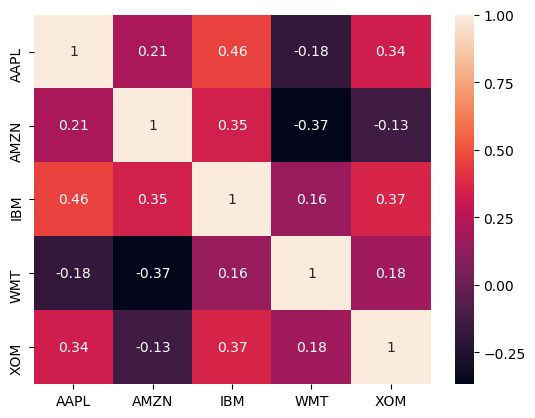

In [172]:
# data prep
data = pd.read_csv('./data/5_stocks.csv', index_col='Date', parse_dates=['Date'])

# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()